In [1213]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from scipy.stats.stats import pearsonr

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import seaborn as sns


In [1214]:
df = pd.read_csv('churn_challenge_data.csv')

df.tail(100)

,Customer_ID,churn,HHstatin,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,crclscod,creditcd,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,dualband,dwllsize,dwlltype,eqpdays,ethnic,forgntvl,hnd_price,hnd_webcap,income,infobase,inonemin_Mean,kid0_2,kid11_15,kid16_17,kid3_5,kid6_10,lor,marital,models,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,new_cell,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,ownrent,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,prizm_social_one,recv_sms_Mean,recv_vce_Mean,refurb_new,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
99900,1099901,1,I,1,3432.0,1761,751.71,2.0,SOUTHWEST AREA,Y,42.333333,26,15,23,96.0,44.0,28.0,163.43,83.86,35.80,0.0,0.333333,0.0,0.333333,0.000000,0.000000,NaN,NaN,0.000000,31.333333,31.333333,ZY,Y,0.000000,NaN,NaN,2.666667,0.000000,2.333333,Y,NaN,M,786.0,N,0.0,29.989990,NaN,6.0,M,8.333333,U,U,U,U,U,NaN,S,1.0,29,NaN,0.000000,36.840000,0.000000,10.950000,0.000000,36.186667,10.296667,0.000000,4.416667,U,1.0,0.000000,10.000000,NaN,NaN,NaN,3.666667,0.000000,32.666667,1.0,0.000000,42.333333,U,0.0,12.000000,N,NaN,NaN,0.0,0.000000,1897,3726.0,NaN,786.69,0.0,0.0,8.333333,1,NaN
99901,1099902,0,C,1,2783.0,1159,485.24,1.0,LOS ANGELES AREA,N,146.666667,223,86,34,239.0,97.0,48.0,231.92,96.58,40.44,0.0,0.333333,0.0,0.666667,0.000000,0.000000,NaN,NaN,0.000000,106.666667,106.666667,A,Y,0.000000,NaN,NaN,8.666667,0.000000,8.333333,Y,A,S,33.0,N,0.0,79.989990,WCMB,5.0,M,29.000000,U,U,U,U,U,8.0,B,5.0,33,NaN,0.000000,224.650000,0.000000,126.540000,0.000000,116.256667,18.143333,2.106667,29.560000,U,NaN,0.000000,67.666667,NaN,NaN,NaN,30.333333,0.000000,54.333333,9.0,0.000000,146.666667,U,0.0,34.666667,R,NaN,NaN,0.0,0.333333,1159,2783.0,NaN,490.08,0.0,0.0,31.666667,1,NaN
99902,1099903,0,I,1,10279.0,2748,1245.86,5.0,LOS ANGELES AREA,N,212.000000,594,114,54,537.0,91.0,56.0,467.23,124.91,56.63,0.0,0.000000,0.0,0.666667,6.070000,11.666667,NaN,NaN,0.000000,115.000000,115.000000,B,Y,11.000000,0.0000,0.0000,8.000000,0.000000,8.000000,Y,A,S,526.0,N,0.0,149.989990,WCMB,9.0,M,12.000000,U,U,U,U,U,13.0,S,2.0,35,809.000000,0.000000,471.426667,0.000000,314.760000,0.000000,217.316667,60.650000,3.266667,13.840000,U,1.0,0.000000,58.666667,0.000000,0.000000,O,20.666667,0.000000,79.666667,2.0,0.000000,212.000000,U,0.0,27.333333,N,52.990000,0.0000,0.0,1.666667,2783,10351.0,69.990000,1330.47,0.0,0.0,90.333333,1,0.000000
99903,1099904,0,NaN,1,7750.0,3999,754.99,NaN,LOS ANGELES AREA,N,359.333333,1113,415,78,789.0,342.0,69.0,645.83,333.25,62.92,0.0,2.000000,0.0,4.666667,0.000000,0.000000,NaN,NaN,0.000000,281.000000,281.000000,A,N,0.000000,NaN,NaN,11.333333,0.000000,9.333333,Y,NaN,NaN,612.0,H,0.0,199.989990,WCMB,NaN,NaN,144.666667,U,U,U,U,U,NaN,U,3.0,35,NaN,0.000000,434.410000,0.000000,247.110000,0.000000,383.633333,196.333333,66.066667,66.106667,U,NaN,0.000000,198.000000,NaN,NaN,NaN,104.666667,0.000000,254.666667,3.0,0.000000,359.333333,U,0.0,205.333333,N,NaN,NaN,0.0,1.000000,4150,7990.0,NaN,854.26,0.0,0.0,67.666667,1,NaN
99904,1099905,1,NaN,2,11516.0,8164,1968.47,NaN,LOS ANGELES AREA,N,220.000000,1160,743,214,876.0,590.0,156.0,500.70,354.96,85.59,0.0,0.333333,0.0,26.666667,0.000000,0.000000,-670.666667,-122.800000,0.000000,161.666667,161.666667,CY,N,0.000000,0.0000,0.0000,12.000000,0.000000,11.666667,N,NaN,NaN,164.0,H,0.0,129.989990,WCMB,NaN,NaN,600.000000,U,U,U,U,U,NaN,U,2.0,33,1027.666667,0.000000,155.193333,0.000000,364.763333,0.000000,353.873333,563.443333,112.406667,48.016667,U,NaN,0.000000,429.666667,338.000000,135.200000,NaN,65.000000,0.0000

In [1215]:
df_copy = df

## Data Exploration

In [1216]:
# Analysing Percentage of Churn

df_copy['churn'].value_counts()

0    50438
1    49562
Name: churn, dtype: int64

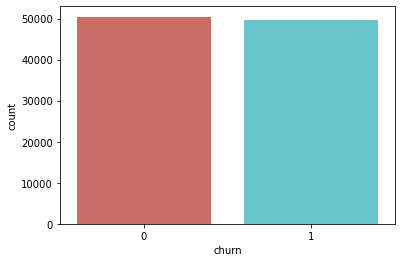

In [1217]:
sns.countplot(x = df_copy['churn'], data = df_copy, palette = 'hls')
plt.show()

50.438% Had instances of Churn between 31-60 days after observation date

49.562% Had no instances of Churn between 31-60 days after observation date

In [1218]:
# Analysing Relationship between Premier household status indicator and churn.

df_copy.groupby('HHstatin').mean()

# HHstatin: Premier household status indicator

,Customer_ID,churn,actvsubs,adjmou,adjqty,adjrev,adults,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,eqpdays,forgntvl,hnd_price,income,inonemin_Mean,lor,models,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,recv_sms_Mean,recv_vce_Mean,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
HHstatin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,1.052369e+06,0.499143,1.264038,8312.500009,3117.453708,992.964625,1.140163,165.078154,584.179168,202.657951,62.344192,574.980659,201.569231,61.861978,545.335257,196.880879,61.733774,0.035362,3.992642,0.024432,1.819117,4.822217,6.106587,-16.501427,-1.112811,1.023075,122.163023,123.186098,2.314616,0.944307,0.290404,11.390127,0.096085,7.266038,366.694599,0.001072,109.106239,5.195699,36.596657,3.536800,1.583583,18.120660,576.891152,2.963626,252.175912,2.007159,196.853840,0.956474,186.319735,131.079123,21.574483,34.081504,1.346895,0.546507,78.986212,43.476027,14.672464,28.746821,0.476568,96.309116,1.840977,1.181240,163.896914,0.051364,66.225389,61.818602,1.427060,0.012645,0.362695,3164.141877,8428.340612,47.934485,1067.364790,0.037291,0.026718,32.696099,1.444706,14.380259
B,1.048121e+06,0.479667,1.369070,8089.539017,3110.207948,1041.608962,2.057917,139.698706,494.496303,173.910351,59.142945,493.130025,174.202575,58.970791,466.124470,170.245786,58.279784,0.010885,3.791436,0.011091,1.663278,3.075367,3.947833,-10.782035,-2.117633,0.505853,105.056891,105.562744,1.566749,0.984321,0.185564,9.750359,0.034401,5.913637,401.957486,0.016944,100.127233,5.378004,28.427398,4.300678,1.589033,19.996303,490.977468,1.402359,217.829964,0.825610,146.095734,0.576751,177.947078,106.243690,17.437801,27.383546,1.437616,0.250359,57.823578,39.249483,12.698038,23.192442,0.255494,90.929657,1.871534,0.566543,139.132163,0.021565,52.944855,58.452045,1.360025,0.080407,0.256624,3153.943007,8196.834787,46.434129,1115.259097,0.191004,0.015404,26.073116,1.562539,12.506703
C,1.045746e+06,0.486377,1.411359,7217.222851,2713.155148,987.067971,2.208925,129.328613,459.129614,159.689858,56.383217,449.926226,157.534044,55.993663,420.927292,151.703479,54.787530,0.014578,3.458951,0.009091,1.452391,2.899638,3.637077,-9.141612,-0.481684,0.679472,97.432590,98.112063,1.371511,0.828701,0.218507,8.682054,0.032870,5.175655,422.540384,0.079849,97.261125,5.833718,24.436262,5.874710,1.548640,20.226485,455.379089,1.672195,206.036469,0.975852,136.294986,0.696343,164.617915,94.912729,14.828047,24.137361,1.521781,0.344120,54.056444,37.102317,12.033327,21.179574,0.335353,81.855570,1.793477,0.753033,128.575580,0.051401,46.084603,56.168106,1.267768,0.101574,0.239129,2752.690957,7315.772362,44.956911,1057.674658,0.229833,0.026114,23.971032,1.593498,11.811801
G,1.052505e+06,0.502831,1.349377,7444.483573,2846.516988,951.766721,2.195357,149.934881,511.036806,183.405436,59.549264,502.935897,181.754079,58.695804,476.374706,176.083907,58.188069,0.021329,3.807475,0.004341,1.695734,4.074481,5.178558,-9.415884,-0.338721,0.788977,110.400906,111.189883,1.975274,0.861079,0.313461,10.797093,0.034541,6.933749,380.260476,0.030578,103.073943,5.282609,33.287656,4.491825,1.554926,18.563986,508.020491,1.729955,219.826801,0.925587,161.435698,0.804371,171.532563,113.198129,16.377450,28.550602,1.459375,0.366742,68.351265,42.208381,14.375106,24.883541,0.422235,89.808985,1.797282,0.876935,149.057946,0.053228,59.548698,59.568845,1.278734,0.050963,0.359570,2889.423556,7547.064881,46.442231,10

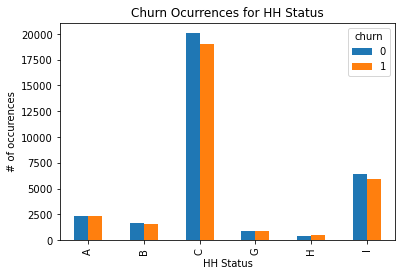

In [1219]:
%matplotlib inline
pd.crosstab(df_copy.HHstatin,df_copy.churn).plot(kind='bar')
plt.title('Churn Ocurrences for HH Status')
plt.xlabel('HH Status')
plt.ylabel('# of occurences')
plt.savefig('churn_HHstatus')

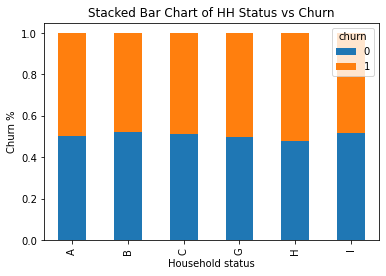

In [1220]:
table=pd.crosstab(df_copy.HHstatin,df_copy.churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of HH Status vs Churn')
plt.xlabel('Household status')
plt.ylabel('Churn %')
plt.savefig('mariral_vs_HHstatin_stacked')

In [1221]:
# Analysing Relationship between credit card indicator and churn.


df_copy.groupby('creditcd').mean()

# creditcd: Credit card indicator

,Customer_ID,churn,actvsubs,adjmou,adjqty,adjrev,adults,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,eqpdays,forgntvl,hnd_price,income,inonemin_Mean,lor,models,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,recv_sms_Mean,recv_vce_Mean,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
creditcd,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
N,1.055765e+06,0.508281,1.279887,8210.099518,2984.041567,956.136802,1.585486,168.900206,617.666237,207.188793,64.681962,608.024914,205.980095,64.248100,584.282598,202.162773,64.152633,0.028882,4.825600,0.015306,2.211789,5.238231,6.629245,-18.569075,-1.366614,0.912644,125.128816,126.041460,2.492288,1.019044,0.334740,11.940732,0.057453,7.028796,347.735701,0.003577,108.740112,4.710330,35.299940,3.989371,1.547095,16.889734,608.658354,2.374085,270.874311,1.548637,209.223766,0.824159,197.591364,136.012966,22.885051,34.918667,1.366498,0.506090,79.928702,47.678824,15.908356,29.354396,0.406554,99.139202,1.791802,1.034188,167.866018,0.046121,65.427402,63.946857,1.466146,0.016562,0.347608,3026.399014,8321.137403,49.128673,1031.922151,0.043630,0.035209,33.026831,1.498421,15.570785
Y,1.047119e+06,0.490213,1.392376,7232.101000,2764.456034,961.048680,2.667445,134.529216,472.279695,167.222968,56.407249,463.220187,165.206306,55.933578,435.026399,159.607876,54.805001,0.018359,3.631952,0.008755,1.573063,2.955929,3.750176,-11.802790,-0.842417,0.706592,101.013421,101.720013,1.465077,0.822012,0.228137,9.125601,0.032722,5.442569,413.433382,0.083083,98.443614,5.905884,27.075854,6.419600,1.545899,19.778877,467.561416,1.588491,207.090936,0.934185,144.493653,0.654306,162.367597,99.819695,15.907964,25.337906,1.578328,0.371186,59.420531,37.670464,12.374888,22.500397,0.335411,83.084536,1.785644,0.784464,133.744752,0.040932,50.045766,56.063196,1.189251,0.113053,0.254207,2804.498141,7330.030897,44.690930,1030.944579,0.255838,0.026792,25.254509,1.569355,12.144079


In [1222]:
df_copy.groupby('crclscod').mean()

# crclscod: Credit class code

# Don't understand what the codes mean, not pursuing this further

,Customer_ID,churn,actvsubs,adjmou,adjqty,adjrev,adults,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,eqpdays,forgntvl,hnd_price,income,inonemin_Mean,lor,models,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,recv_sms_Mean,recv_vce_Mean,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
crclscod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,1.025826e+06,0.517298,1.547717,9109.159953,3613.535067,1366.252432,2.627587,112.334981,391.620970,143.086609,52.694046,384.487812,141.534245,52.641141,345.992426,134.153997,51.391976,0.005452,2.630384,0.009139,1.247293,1.641383,2.050090,-10.735864,-1.067203,0.396564,86.381031,86.777595,0.812564,0.780777,0.115259,7.058347,0.020809,4.401702,565.229407,0.087974,75.119171,6.357633,21.387346,6.598233,1.794775,29.412273,388.141598,0.930657,178.021432,0.504090,104.293913,0.426568,155.482745,81.792882,13.458647,21.775895,1.568429,0.192771,42.846964,33.526392,10.188096,19.364478,0.203793,77.535734,2.106790,0.440457,111.894524,0.033243,40.516161,52.297743,1.038071,0.120788,0.156625,3673.036479,9254.737738,41.613084,1436.523858,0.253518,0.017632,19.719189,1.880737,10.070384
A2,1.036305e+06,0.615563,1.106852,3949.141696,1416.169570,651.569837,2.733333,83.483933,254.675958,87.598142,43.491289,247.619271,85.452409,43.717979,225.049454,77.399791,35.441452,0.031359,3.886953,0.002323,0.487805,1.356825,1.630662,-10.027486,-1.201288,0.138211,61.885017,62.023229,0.509485,0.483023,0.031516,7.818815,0.013163,3.887340,542.524971,0.080513,54.445315,6.195509,12.037940,6.944218,1.286876,21.386760,251.332849,0.419423,129.362265,0.295575,75.128173,0.123848,98.064290,43.806969,5.122877,11.837762,1.538043,0.087108,29.554394,25.369435,8.898437,11.570654,0.051103,51.083624,1.391405,0.184669,83.299264,0.003097,22.399535,43.036645,1.396411,0.109685,0.180023,1446.939605,4039.259001,34.047845,672.290174,0.255543,0.001936,14.426636,1.121951,8.866660
A3,1.046020e+06,0.666667,1.666667,20078.000000,6017.333333,2156.110000,1.000000,297.555556,1116.333333,334.000000,97.666667,1067.666667,312.666667,96.666667,1039.256667,324.616667,119.743333,0.000000,1.333333,0.000000,2.555556,0.074444,0.111111,-55.416667,20.265833,0.000000,258.888889,258.888889,0.111111,1.485000,0.000000,15.333333,0.000000,14.000000,410.333333,0.000000,66.656657,6.000000,39.111111,7.000000,1.333333,18.666667,1098.083333,0.000000,664.857778,0.000000,60.856667,0.000000,669.786667,65.785556,8.736667,42.947778,1.000000,0.000000,33.777778,31.000000,11.716667,33.000000,0.000000,274.111111,1.666667,0.000000,297.555556,0.000000,56.666667,104.590833,13.999167,0.000000,0.000000,6147.333333,20582.000000,78.326667,2381.216667,0.000000,0.000000,24.888889,1.666667,11.716667
AA,1.056260e+06,0.505684,1.408338,5553.743385,1921.753157,729.328935,2.590762,115.878605,441.198061,145.333206,53.459339,433.496947,143.567654,53.079458,417.991474,140.141251,52.583897,0.025309,3.320432,0.007048,1.199467,2.047611,2.601130,-9.447160,-0.601441,0.577374,87.579821,88.157194,1.092772,0.703616,0.199541,8.034165,0.027975,4.660449,373.180810,0.072463,108.082486,6.085513,20.883234,6.359606,1.316451,15.426470,437.795490,1.209072,196.941499,0.695614,137.827673,0.513457,144.637906,85.564063,14.570138,23.419299,1.573748,0.296228,50.371936,33.281054,11.105300,20.000876,0.281145,70.281374,1.473348,0.656003,115.222603,0.044290,39.832945,53.265601,1.157757,0.091154,0.208405,1946.944671,5621.491165,44.511654,799.36746

In [1223]:
# Analysing Relationship between Marital Status and churn.

df_copy.groupby('marital').mean()

# marital: Marital Status

,Customer_ID,churn,actvsubs,adjmou,adjqty,adjrev,adults,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,eqpdays,forgntvl,hnd_price,income,inonemin_Mean,lor,models,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,recv_sms_Mean,recv_vce_Mean,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
marital,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,1.046665e+06,0.489689,1.445720,7275.513588,2845.218482,986.926403,3.002529,132.894617,463.014786,167.413230,57.624903,455.169717,165.369280,57.136490,426.675981,159.352475,55.794210,0.019780,3.977821,0.009533,1.550519,2.796056,3.565110,-18.878316,-1.391245,0.551102,99.154929,99.706031,1.392153,0.928516,0.164740,9.140208,0.028405,5.114202,411.090467,0.002140,95.495984,5.806414,25.349546,5.204331,1.532490,19.654086,456.964149,1.381082,201.188028,0.943719,127.539907,0.437362,167.831804,94.238163,14.532973,22.450423,1.576026,0.317639,54.081971,39.292732,12.777644,20.642542,0.233463,86.133333,1.773152,0.633398,132.261219,0.017380,47.890337,57.180663,1.569967,0.144942,0.228080,2883.357393,7368.439110,45.086717,1056.699304,0.340661,0.034112,25.492931,1.631518,12.612796
B,1.048600e+06,0.496908,1.299747,8429.931567,3153.997470,1056.434465,1.000000,156.502764,555.245784,191.705312,62.065908,544.584357,189.648113,61.738470,512.178995,184.299456,61.067031,0.024358,3.732621,0.011055,1.910483,3.963162,4.983043,-10.692731,-0.636120,0.796046,117.874321,118.670367,1.871042,1.025460,0.285234,10.277825,0.033914,6.486931,386.145587,0.001967,104.914115,5.082065,30.943086,3.497332,1.613406,19.502670,550.202162,1.790919,246.889476,1.093435,174.881631,0.697486,191.970035,120.024048,19.332493,31.545100,1.379813,0.409312,69.596075,44.622798,14.462936,26.704281,0.386734,95.865514,1.888702,0.877834,155.624930,0.108675,57.973253,61.681687,1.157382,0.035694,0.305977,3198.790753,8540.483049,48.000189,1130.271173,0.086565,0.023515,29.429876,1.478499,14.172905
M,1.046722e+06,0.488664,1.449246,6411.492736,2445.933370,909.870196,3.080929,118.191475,410.396689,146.248003,52.699118,403.303160,144.598609,52.322569,379.842985,139.283445,51.065050,0.015318,3.447894,0.005904,1.340225,2.269229,2.888370,-12.185975,-1.130815,0.582475,88.994847,89.577322,1.159067,0.739712,0.186513,8.049186,0.027588,4.558386,434.008019,0.121248,94.033256,6.479908,22.096086,7.518081,1.486861,20.039836,405.834937,1.293300,183.206305,0.716599,119.764633,0.576700,146.246106,82.838559,12.911848,20.609105,1.637574,0.306915,49.495760,32.276749,10.534832,19.011615,0.275570,74.438308,1.699858,0.649770,117.541704,0.026762,41.456525,52.270294,1.142944,0.154322,0.202359,2481.551655,6498.890092,42.947565,977.152007,0.347771,0.024389,21.826420,1.622730,10.346879
S,1.048703e+06,0.474670,1.282862,7991.956774,3033.589437,992.875804,2.343791,152.448082,541.587451,189.099563,60.031372,531.205219,187.208125,59.505347,499.152804,181.846659,58.596928,0.015053,3.919858,0.010514,1.858134,3.980774,5.041225,-8.672411,0.029697,1.005881,113.856111,114.861992,1.922524,0.867445,0.295341,10.362758,0.047579,6.380269,386.941000,0.085437,103.887045,4.959151,32.883039,5.742568,1.609690,19.268962,537.257066,2.197917,234.132338,1.346304,179.931377,0.851614,173.993119,119.865891,19.497550,30.564934,1.511157,0.541707,73.019421,42.616124,14.271117,26.532119,0.464174,89.550462,1.877461,1.098410,151.349672,0.056712,59.641043,59.937476,1.304275,0.073410,0.342335,3077.502014,8099.291821,46.426829,1065.498

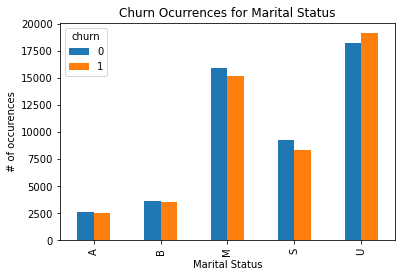

In [1224]:
%matplotlib inline
pd.crosstab(df_copy.marital,df_copy.churn).plot(kind='bar')
plt.title('Churn Ocurrences for Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('# of occurences')
plt.savefig('churn_maritalstatus')

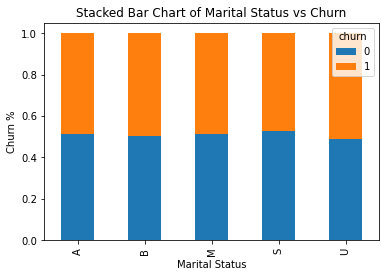

In [1225]:
table=pd.crosstab(df_copy.marital,df_copy.churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Churn')
plt.xlabel('Marital Status')
plt.ylabel('Churn %')
plt.savefig('mariral_vs_churn_stack')

In [1226]:
df_copy.groupby('actvsubs').mean()

# actvsubs: Number of active subscribers in household

,Customer_ID,churn,adjmou,adjqty,adjrev,adults,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,eqpdays,forgntvl,hnd_price,income,inonemin_Mean,lor,models,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,recv_sms_Mean,recv_vce_Mean,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
actvsubs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.054366e+06,0.407407,10094.112222,3757.691358,1214.829383,2.237288,224.473251,807.049383,284.654321,80.925926,768.338028,273.323944,78.014085,699.354568,246.271605,76.771481,0.032922,5.786008,0.004115,4.238683,9.333045,11.506173,77.108974,14.719231,4.592593,162.386831,166.979424,3.934156,1.464630,0.637531,16.687243,0.172840,10.695473,332.234568,0.062500,124.864990,5.392857,49.032922,5.720000,1.777778,18.012346,820.790123,11.529177,326.265021,7.486420,254.240700,4.042716,256.717778,184.693580,45.341070,58.487695,1.529412,2.736626,107.078189,86.884774,28.305432,41.082305,1.855967,127.917695,2.037037,4.823045,219.650206,0.024691,89.053498,86.166420,1.328117,0.112500,0.543210,3791.567901,10181.346790,55.434146,1298.285802,0.150000,0.024691,44.197531,1.432099,27.667901
1,1.050719e+06,0.486728,7715.644698,2850.240627,965.036306,2.477223,152.068958,544.528061,185.623476,60.535350,533.673361,183.562024,60.003906,508.117208,179.164677,59.436093,0.031058,4.226632,0.011311,1.868487,4.218185,5.365214,-15.040295,-1.085071,0.881655,113.305941,114.187596,2.076359,0.911385,0.277253,10.580769,0.047454,6.275625,390.781192,0.052704,102.722801,5.641295,30.799709,6.198593,1.530947,18.668865,538.752175,2.086144,241.208389,1.309543,181.103404,0.776034,177.713318,117.672411,17.212974,28.559793,1.553630,0.482143,70.656483,41.917750,14.077243,24.670585,0.399512,89.468769,1.774981,0.993111,151.075847,0.053500,56.964776,60.114996,1.335428,0.074014,0.304341,2886.707986,7808.008495,47.237964,1036.443057,0.171950,0.032944,29.121559,1.151707,13.796232
2,1.048055e+06,0.522152,7009.642210,2718.861395,942.431253,2.581745,128.282027,454.116166,163.431332,55.918885,445.762708,161.676089,55.401699,420.328503,156.478961,54.205265,0.013676,3.538667,0.011765,1.508380,2.510237,3.123659,-11.872910,-0.882919,0.493025,96.535787,97.028813,1.148022,0.825061,0.217987,8.658559,0.022548,5.083668,399.894153,0.069399,99.415919,6.043931,25.993503,5.960280,1.562607,19.255548,446.957736,1.199340,195.542054,0.668751,125.057431,0.530589,164.742093,94.290219,19.850382,27.573159,1.573733,0.246704,52.753474,38.668398,12.257655,24.183960,0.246322,84.499891,1.791991,0.550556,127.731472,0.033754,48.421096,55.314583,1.161725,0.097641,0.233997,2767.458971,7130.109068,43.744758,1014.902079,0.221239,0.021306,24.093754,2.236754,12.037698
3,1.049440e+06,0.491790,7570.258827,3087.133475,955.671997,2.927080,139.487465,482.090307,184.296875,55.329714,476.431657,182.935484,55.463095,447.843144,175.657383,54.215885,0.010240,3.485787,0.021010,1.831038,1.932973,2.441296,-10.367335,-1.025307,0.599665,104.942090,105.541755,0.946681,0.833454,0.240635,9.072299,0.027631,5.548641,370.751059,0.075687,101.699461,6.216824,32.737730,6.897704,1.661017,18.977489,474.396316,1.516665,192.918862,0.945153,138.816769,0.571518,162.360393,108.332521,22.408238,29.597240,1.693322,0.297846,64.928761,38.733154,12.132966,27.459746,0.301907,90.513771,1.910222,0.660399,138.827066,0.026395,59.342956,54.536434,1.148798,0.121427,0.248676,3150.082097,7718.838393,42.863394,1029.062479,0.266540,0.022864,26.667726,

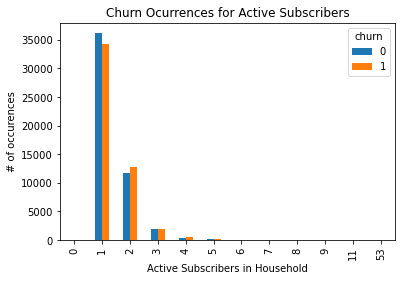

In [1227]:
%matplotlib inline
pd.crosstab(df_copy.actvsubs,df_copy.churn).plot(kind='bar')
plt.title('Churn Ocurrences for Active Subscribers')
plt.xlabel('Active Subscribers in Household')
plt.ylabel('# of occurences')
plt.savefig('churn_actvusers')

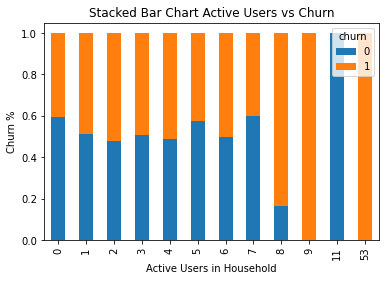

In [1228]:
table=pd.crosstab(df_copy.actvsubs,df_copy.churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart Active Users vs Churn')
plt.xlabel('Active Users in Household')
plt.ylabel('Churn %')
plt.savefig('mariral_vs_activeusers_stack')

In [1229]:
df_copy.groupby('uniqsubs').mean()

# uniqsubs: Number of unique subscribers in the household

,Customer_ID,churn,actvsubs,adjmou,adjqty,adjrev,adults,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,eqpdays,forgntvl,hnd_price,income,inonemin_Mean,lor,models,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,recv_sms_Mean,recv_vce_Mean,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,vceovr_Mean
uniqsubs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.050829e+06,0.476665,0.999080,7613.407919,2809.263919,956.637059,2.478010,151.532042,541.328438,185.023158,60.278201,530.691998,182.917287,59.756246,504.839971,178.342348,59.086641,0.032948,4.234139,0.009290,1.871115,4.168520,5.325781,-13.986014,-1.060065,0.875445,112.860830,113.736275,2.089600,0.896609,0.281421,10.562774,0.049393,6.246294,394.083886,0.053111,103.280213,5.625580,30.757991,6.252803,1.511289,18.652374,536.003827,2.110102,239.250952,1.333473,180.623362,0.775983,175.773664,117.210283,17.107057,28.299796,1.551716,0.480258,70.812884,41.683967,14.004033,24.546660,0.395187,88.811916,1.750311,0.991407,150.540635,0.056111,56.838936,59.897718,1.361345,0.073527,0.308099,2840.648081,7689.955688,47.117564,1027.036129,0.172253,0.033621,29.044350,13.718845
2,1.048139e+06,0.522246,1.742597,7236.684412,2773.736028,956.113589,2.557078,132.707347,471.990274,166.681267,56.831579,463.029507,165.085933,56.286705,438.348543,160.321604,55.389904,0.015072,3.683070,0.014504,1.542132,2.844393,3.547177,-14.903530,-0.822839,0.570910,99.711714,100.282624,1.306939,0.861206,0.229703,9.033411,0.023842,5.311426,398.577043,0.064969,99.200845,5.986949,26.653360,5.978833,1.567644,19.256496,464.901365,1.324487,206.188310,0.750234,136.689287,0.574251,167.829262,98.364355,18.688175,27.415576,1.567793,0.292592,55.809285,39.210106,12.646760,23.947888,0.278318,85.311656,1.800370,0.631853,132.075495,0.030157,49.621159,56.315474,1.153685,0.092488,0.239524,2824.203331,7366.640923,44.425966,1028.444465,0.210654,0.022028,24.950694,12.415051
3,1.049427e+06,0.528652,2.249126,7941.030357,3117.990576,995.343257,2.731674,145.580889,515.594467,185.900745,58.382885,505.620275,183.812747,58.325320,479.177883,178.658322,57.562526,0.011603,3.524345,0.019101,1.836297,3.267264,4.017480,-9.124987,-1.064158,0.737599,109.094290,109.831889,1.398338,0.893931,0.233915,9.581953,0.033845,6.012160,366.872777,0.067110,101.294272,6.063256,31.744591,6.295099,1.686883,18.986168,507.248307,1.558940,217.436419,0.901768,152.708410,0.657177,177.701200,113.058353,22.946293,31.805409,1.641217,0.375538,64.716370,40.724941,12.995841,27.626843,0.362112,93.005827,1.962000,0.808026,144.772863,0.021128,58.330597,57.547308,1.204728,0.105149,0.267518,3185.747226,8113.730401,45.322586,1073.743195,0.231483,0.024978,28.002229,12.758853
4,1.051116e+06,0.548905,2.608764,7368.274206,2911.563772,931.671671,2.733367,140.330073,496.356416,182.840767,58.410407,487.455285,179.872358,57.506098,451.983470,170.888572,55.934358,0.011607,3.706312,0.025300,1.846896,2.543992,3.131064,-3.990154,-1.279890,0.618675,105.841158,106.459833,1.110720,0.883283,0.191386,9.330856,0.024909,5.588028,359.427621,0.063753,99.598532,6.208831,30.183881,6.247676,1.665102,18.211659,490.836371,1.454730,209.205428,0.800836,138.361025,0.653891,177.869407,107.071937,21.147055,30.083655,1.651840,0.270083,60.665754,43.366874,13.552307,27.097418,0.348592,92.470657,1.917058,0.688315,139.641758,0.053339,55.844027,57.317050,1.101397,0.113071,0.227700,2982.656886,7548.542224,44.144667,1008.519527,0.217723,0.033125,26.256521,1

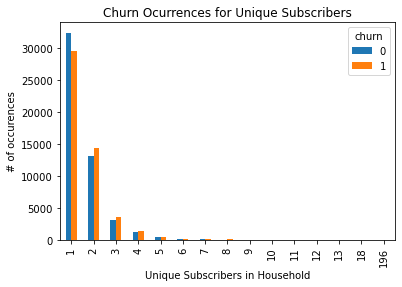

In [1230]:
%matplotlib inline
pd.crosstab(df_copy.uniqsubs,df_copy.churn).plot(kind='bar')
plt.title('Churn Ocurrences for Unique Subscribers')
plt.xlabel('Unique Subscribers in Household')
plt.ylabel('# of occurences')
plt.savefig('churn_uniqsubs')

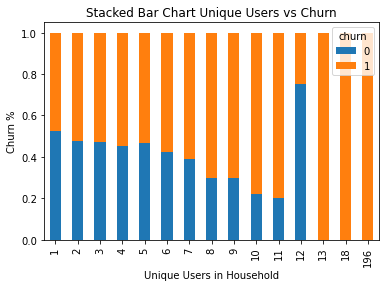

In [1231]:
table=pd.crosstab(df_copy.uniqsubs,df_copy.churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart Unique Users vs Churn')
plt.xlabel('Unique Users in Household')
plt.ylabel('Churn %')
plt.savefig('mariral_vs_activeusers_stack')

In [1232]:
# Active Subscribers and Unique Subscribers seem to have inverse relationship to churn

In [1233]:
correlation_matrix = df.corr(method = 'pearson')

correlation_to_churn = correlation_matrix['churn']

correlation_to_churn.sort_values(ascending = False)

churn              1.000000
eqpdays            0.112691
uniqsubs           0.039882
vceovr_Mean        0.024240
ovrrev_Mean        0.023736
months             0.020991
ovrmou_Mean        0.019720
actvsubs           0.019686
roam_Mean          0.009324
change_rev         0.007832
income             0.005260
numbcars           0.002392
rv                 0.000489
recv_sms_Mean     -0.000812
datovr_Mean       -0.001290
callfwdv_Mean     -0.002248
adjrev            -0.002900
totrev            -0.003017
blck_dat_Mean     -0.004016
truck             -0.004097
unan_dat_Mean     -0.004727
forgntvl          -0.004986
mou_pead_Mean     -0.005566
drop_dat_Mean     -0.006223
peak_dat_Mean     -0.007580
adults            -0.007968
mou_cdat_Mean     -0.008252
mou_opkd_Mean     -0.008366
avgrev            -0.008780
comp_dat_Mean     -0.008882
opk_dat_Mean      -0.008898
blck_vce_Mean     -0.009023
plcd_dat_Mean     -0.009499
rev_Mean          -0.010883
avg3rev           -0.012702
da_Mean           -0

# Trying a Regression



### Logistic Regression (Because we have a binary dependent variable)

I'll first try a logistic regression with one independent variable 

Later I'll try to improve the model to a multivariate logistic regression

In [1234]:
df_copy_churn_price = df_copy[['churn', 'hnd_price']]
# hnd_price: Current handset price

df_copy_churn_price = df_copy_churn_price.dropna()

df_copy_churn_price

,churn,hnd_price
0,1,149.98999
2,1,29.98999
3,0,29.98999
4,0,149.98999
5,0,129.98999
...,...,...
99995,1,29.98999
99996,0,29.98999
99997,0,199.98999
99998,0,149.98999


In [1235]:
X = df_copy_churn_price.hnd_price

In [1236]:
X_array = X.values

X_array

array([149.9899902 ,  29.98999023,  29.98999023, ..., 199.9899902 ,
       149.9899902 , 149.9899902 ])

In [1237]:
X_array = X_array.reshape(-1,1)

len(X_array)

99153

In [1238]:
Y = df_copy_churn_price.churn

Y

0        1
2        1
3        0
4        0
5        0
        ..
99995    1
99996    0
99997    0
99998    0
99999    1
Name: churn, Length: 99153, dtype: int64

In [1239]:
Y_array = Y.values

In [1240]:
model = LogisticRegression(solver = 'liblinear', random_state = 0)

In [1241]:
model.fit(X_array, Y_array)

LogisticRegression(random_state=0, solver='liblinear')

In [1242]:
model.intercept_


array([0.33349136])

In [1243]:
model.coef_

array([[-0.00341267]])

In [1244]:
model.predict_proba(X_array)

array([[0.5444758 , 0.4555242 ],
       [0.44246955, 0.55753045],
       [0.44246955, 0.55753045],
       ...,
       [0.58637701, 0.41362299],
       [0.5444758 , 0.4555242 ],
       [0.5444758 , 0.4555242 ]])

In [1245]:
model.predict(X_array)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [1246]:
model.score(X_array, Y_array)

0.5459643177715248

In [1247]:
# Creating Confusion Matrix

confusion_matrix(Y_array, model.predict(X_array))

# True negatives in the upper-left position
# False negatives in the lower-left position
# False positives in the upper-right position
# True positives in the lower-right position

array([[29514, 20388],
       [24631, 24620]], dtype=int64)

In [1248]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

# Multivariate Logistic Regression 

In [1249]:
df_copy_not_nan = df_copy.dropna()

# Removing nans

df_copy_not_nan

,Customer_ID,churn,HHstatin,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,crclscod,creditcd,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,dualband,dwllsize,dwlltype,eqpdays,ethnic,forgntvl,hnd_price,hnd_webcap,income,infobase,inonemin_Mean,kid0_2,kid11_15,kid16_17,kid3_5,kid6_10,lor,marital,models,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,new_cell,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,ownrent,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,prizm_social_one,recv_sms_Mean,recv_vce_Mean,refurb_new,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
0,1000001,1,C,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,272,116,30,322.0,136.0,38.0,83.37,32.69,29.66,0.0,0.666667,0.0,0.333333,0.000000,0.000000,-157.250000,-18.997500,0.000000,45.000000,45.000000,A,Y,0.000000,0.2475,0.000,1.333333,0.0,0.666667,Y,A,S,361.0,N,0.0,149.98999,WCMB,4.0,M,18.000000,U,U,U,U,U,15.0,S,2.0,61,219.250000,0.000000,90.643333,0.000000,55.220000,0.0,132.600000,97.176667,0.000000,0.000000,U,3.0,0.000000,24.000000,0.000000,0.000000,O,0.000000,0.0,58.000000,2.0,0.000000,52.333333,S,0.0,42.333333,N,23.997500,0.0000,0.0,0.000000,1652,4228.00000,22.5000,1504.62,0.0,0.0,6.333333,2,0.000000
4,1000005,0,C,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,558,191,55,586.0,196.0,80.0,249.38,79.50,38.69,0.0,0.666667,0.0,0.000000,11.076667,15.000000,38.500000,0.000000,0.000000,137.000000,137.000000,A,Y,8.666667,0.0000,0.000,10.333333,0.0,9.666667,Y,O,M,434.0,I,0.0,149.98999,WCMB,6.0,M,66.000000,U,U,U,U,U,5.0,S,4.0,57,570.500000,0.000000,285.233333,0.000000,218.086667,0.0,173.476667,106.330000,0.366667,10.816667,Y,1.0,0.000000,90.333333,0.000000,0.000000,R,14.666667,0.0,97.333333,6.0,0.000000,222.333333,U,0.0,94.666667,N,55.230000,0.0000,0.0,0.000000,4485,14028.00000,71.9800,2181.12,0.0,0.0,77.000000,1,0.000000
9,1000010,0,I,2,976.00,377,1457.84,2.0,DALLAS AREA,N,6.666667,6,3,30,54.0,7.0,34.0,17.75,6.85,26.51,0.0,1.000000,0.0,0.000000,0.000000,0.000000,59.500000,4.027500,0.000000,3.333333,3.333333,A,Y,0.000000,0.2475,0.000,1.000000,0.0,0.000000,Y,A,S,601.0,N,1.0,79.98999,WCMB,9.0,M,0.000000,U,U,U,U,U,8.0,M,2.0,57,25.500000,0.000000,3.800000,0.000000,1.933333,0.0,1.866667,0.000000,0.000000,0.000000,N,2.0,0.000000,1.666667,0.000000,0.000000,O,0.000000,0.0,1.666667,2.0,0.000000,6.666667,C,0.0,0.000000,N,31.662500,0.0000,0.0,0.000000,391,994.00000,29.9900,1458.42,0.0,0.0,2.333333,2,0.000000
14,1000015,0,I,1,69104.08,33139,6572.70,3.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,344.666667,2038,637,248,1817.0,576.0,182.0,1212.35,581.39,115.31,0.0,0.000000,0.0,1.000000,3.316667,3.333333,-200.500000,-106.765000,0.000000,296.000000,296.000000,C,Y,0.333333,2.2275,0.000,9.000000,0.0,9.000000,Y,A,S,199.0,N,0.0,149.98999,WCMB,3.0,M,126.333333,U,U,U,U,Y,11.0,S,6.0,59,1971.500000,0.000000,581.296667,0.000000,435.193333,0.0,864.173333,718.070000,9.263333,35.163333,Y,2.0,0.000000,128.666667,249.500000,99.800000,O,49.333333,0.0,351.666667,10.0,0.000000,344.666667,S,0.0,271.333333,N,212.515000,35.4975,0.0,0.000000,33184,69161.08333,84.9900,6616.72,0.0,0.0,43.666667,5,99.800000
16,1000017,0,C,1,11316.00,4067,1722.98,2.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,138.333333,446,193,63,429.0,183.0,64.0,332.82,119.62,50.68,0.0,0.000000,0.0,1.666667,8.270000,10.666667,-16.250000,0.212500,0.000000,118.000000,118.000000,B,Y,3.666667,0.0000,0.000,5.000000,0.0,5.000000,N,A,S,530.0,N,0.0,29.98999,WCMB,3.0,M,22.000000,U,U,U,U,U,3.0,U,2.0,57,440.250000,0.000000,225.053333,0.000000,50.370000,0.0,268.560000,93.876667

In [1250]:
# Choosing some Independent Variables

df_for_multivariate_logistic_regression = df_copy_not_nan[['churn', 'hnd_price', 'actvsubs', 'totcalls']]

df_for_multivariate_logistic_regression

,churn,hnd_price,actvsubs,totcalls
0,1,149.98999,1,1652
4,0,149.98999,1,4485
9,0,79.98999,2,391
14,0,149.98999,1,33184
16,0,29.98999,1,4078
...,...,...,...,...
99939,1,149.98999,1,3378
99940,1,29.98999,1,1262
99963,0,199.98999,1,1614
99970,1,29.98999,2,2838


In [1251]:
Y_multi = df_for_multivariate_logistic_regression['churn']

Y_multi_array = Y_multi.values

Y_multi_array

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [1252]:
X_multi = df_for_multivariate_logistic_regression[['hnd_price', 'actvsubs', 'totcalls']]

X_multi_array = X_multi.values

X_multi_array

array([[1.49989990e+02, 1.00000000e+00, 1.65200000e+03],
       [1.49989990e+02, 1.00000000e+00, 4.48500000e+03],
       [7.99899902e+01, 2.00000000e+00, 3.91000000e+02],
       ...,
       [1.99989990e+02, 1.00000000e+00, 1.61400000e+03],
       [2.99899902e+01, 2.00000000e+00, 2.83800000e+03],
       [2.99899902e+01, 1.00000000e+00, 4.17000000e+02]])

In [1253]:
# Splitting data into Train and test

x_train, x_test, y_train, y_test =\
    train_test_split(X_multi_array, Y_multi_array, test_size = 0.2, random_state = 0)

print(f'{x_train}, {len(x_train)}')

#print(f'{x_test}, {len(x_test)}')

#print(f'{y_train}, {len(y_train)}')

#print(f'{y_test}, {len(y_test)}')

[[1.49989990e+02 2.00000000e+00 2.12300000e+03]
 [1.49989990e+02 2.00000000e+00 1.88600000e+03]
 [1.99989990e+02 2.00000000e+00 6.59000000e+02]
 ...
 [2.99899902e+01 1.00000000e+00 1.99900000e+03]
 [9.98999786e+00 3.00000000e+00 4.03300000e+03]
 [1.99989990e+02 1.00000000e+00 8.13200000e+03]], 21364


In [1254]:
# Standardization

scaler = StandardScaler()

x_train_s = scaler.fit_transform(x_train)

x_train_s

array([[ 0.77572947,  0.79571478, -0.17174082],
       [ 0.77572947,  0.79571478, -0.23237543],
       [ 1.62103308,  0.79571478, -0.54629384],
       ...,
       [-1.2529992 , -0.66586639, -0.20346526],
       [-1.59112051,  2.25729595,  0.31691782],
       [ 1.62103308, -0.66586639,  1.3656151 ]])

In [1255]:
# Creating our Model

model_multi = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)

model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [1256]:
# Evaluating our Model

x_test = scaler.transform(x_test)

y_pred = model.predict(x_test)

model.score(x_train,y_train)

0.554109717281408

In [1257]:
model.score(x_test, y_test)

0.46283467515446547

In [1258]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

# True negatives in the upper-left position
# False negatives in the lower-left position
# False positives in the upper-right position
# True positives in the lower-right position

cm

array([[   0, 2869],
       [   0, 2472]], dtype=int64)

# Multivariate Logistic Regression 2

The last try of a Multivariate logistic regression was not so great, I'm going to try again with all countnuous variables

In [1259]:
df_copy

,Customer_ID,churn,HHstatin,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,crclscod,creditcd,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,dualband,dwllsize,dwlltype,eqpdays,ethnic,forgntvl,hnd_price,hnd_webcap,income,infobase,inonemin_Mean,kid0_2,kid11_15,kid16_17,kid3_5,kid6_10,lor,marital,models,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,new_cell,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,ownrent,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,prizm_social_one,recv_sms_Mean,recv_vce_Mean,refurb_new,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
0,1000001,1,C,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,272,116,30,322.0,136.0,38.0,83.37,32.69,29.66,0.0,0.666667,0.0,0.333333,0.000000,0.000000,-157.25,-18.9975,0.000000,45.000000,45.000000,A,Y,0.000000,0.2475,0.0,1.333333,0.0,0.666667,Y,A,S,361.0,N,0.0,149.98999,WCMB,4.0,M,18.000000,U,U,U,U,U,15.0,S,2.0,61,219.25,0.000000,90.643333,0.0,55.220000,0.000000,132.600000,97.176667,0.000000,0.000000,U,3.0,0.0,24.000000,0.00,0.0,O,0.000000,0.000000,58.000000,2.0,0.000000,52.333333,S,0.0,42.333333,N,23.9975,0.0,0.0,0.000000,1652,4228.00000,22.500,1504.62,0.0,0.0,6.333333,2,0.0
1,1000002,0,C,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,263.333333,305,158,40,477.0,275.0,48.0,479.40,265.89,51.53,0.0,1.000000,0.0,5.666667,5.463333,6.333333,532.25,50.9875,0.000000,193.333333,193.333333,EA,Y,1.666667,0.2475,0.0,9.333333,0.0,8.333333,N,A,S,240.0,Z,0.0,NaN,WC,5.0,M,53.000000,U,U,U,U,U,1.0,S,6.0,56,482.75,0.000000,189.396667,0.0,169.343333,0.000000,75.333333,55.280000,3.696667,24.216667,N,1.0,0.0,157.000000,22.75,9.1,NaN,46.333333,0.000000,83.666667,7.0,0.000000,263.333333,U,0.0,69.000000,N,57.4925,0.0,1.0,0.333333,14654,26400.00000,37.425,2851.68,1.0,0.0,61.333333,1,9.1
2,1000003,1,C,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,12,7,17,11.0,6.0,17.0,433.98,140.86,34.54,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-4.25,0.0000,0.000000,6.000000,6.000000,C,Y,0.000000,0.0000,0.0,0.333333,0.0,0.333333,N,A,S,1504.0,N,0.0,29.98999,NaN,5.0,M,0.333333,U,U,U,Y,U,7.0,M,1.0,58,10.25,0.000000,5.426667,0.0,0.233333,0.000000,5.193333,0.000000,0.000000,0.000000,Y,2.0,0.0,1.000000,0.00,0.0,O,0.000000,0.000000,5.000000,2.0,0.000000,9.000000,S,0.0,0.333333,N,16.9900,0.0,0.0,0.000000,7903,24385.05333,16.990,2155.91,0.0,0.0,2.666667,1,0.0
3,1000004,0,C,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,3.666667,8,3,38,50.0,25.0,40.0,63.23,30.81,40.45,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-1.50,0.0000,0.000000,3.666667,3.666667,B,Y,0.000000,0.0000,0.0,0.000000,0.0,0.000000,N,D,M,1812.0,U,0.0,29.98999,NaN,6.0,M,1.333333,Y,U,U,U,U,6.0,M,1.0,60,7.50,0.000000,8.410000,0.0,5.450000,0.000000,3.380000,0.413333,0.000000,0.256667,Y,1.0,0.0,3.666667,0.00,0.0,NaN,0.333333,0.000000,1.333333,1.0,0.000000,3.666667,T,0.0,1.333333,N,38.0000,0.0,0.0,0.000000,1502,3065.00000,38.000,2000.90,0.0,0.0,0.000000,1,0.0
4,1000005,0,C,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,558,191,55,586.0,196.0,80.0,249.38,79.50,38.69,0.0,0.666667,0.0,0.000000,11.076667,15.000000,38.50,0.0000,0.000000,137.000000,137.000000,A,Y,8.666667,0.0000,0.0,10.333333,0.0,9.666667,Y,O,M,434.0,I,0.0,149.98999,WCMB,6.0,M,66.000000,U,U,U,U,U,5.0,S,4.0,57,570.50,0.000000,285.233333,0.0,218.086667,0.000000,173.476667,106.330000,0.366667,10.816667,Y,1.0,0.0,90.333333,0.00,0.0,R,14.666667,0.000000,97.333333,6.0,0.000000,222.333333,U,0.0,94.666667,N,55.2300,0.0,0.0,0.000000,4485,14028.00000,71.980,2181.12,0.0,0.0,77.000000,1,0.0
...,...,...,...,..

In [1260]:
df_multi2 = df_copy[['churn', 'actvsubs', 'adjmou', 'adjqty', 'adjrev', 'adults', 'attempt_Mean', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'avgmou', 'avgqty', 'avgrev', 'blck_dat_Mean', 'blck_vce_Mean', 'callfwdv_Mean', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_mou', 'change_rev', 'comp_dat_Mean', 'comp_vce_Mean', 'complete_Mean', 'custcare_Mean', 'da_Mean', 'datovr_Mean', 'drop_blk_Mean', 'drop_dat_Mean', 'drop_vce_Mean', 'drop_vce_Mean', 'eqpdays', 'hnd_price', 'income', 'inonemin_Mean', 'lor', 'models', 'months', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean', 'mou_opkd_Mean', 'mou_opkv_Mean', 'mou_pead_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouiwylisv_Mean', 'numbcars', 'opk_dat_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'owylis_vce_Mean', 'peak_dat_Mean', 'phones', 'plcd_dat_Mean', 'plcd_vce_Mean', 'recv_sms_Mean', 'recv_vce_Mean', 'rev_Mean', 'roam_Mean', 'threeway_Mean', 'totcalls', 'totmou', 'totmrc_Mean', 'totrev', 'unan_dat_Mean', 'unan_vce_Mean', 'uniqsubs', 'vceovr_Mean']]

df_multi2_not_nan = df_multi2.dropna()

df_multi2_not_nan

,churn,actvsubs,adjmou,adjqty,adjrev,adults,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,drop_vce_Mean,eqpdays,hnd_price,income,inonemin_Mean,lor,models,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouiwylisv_Mean,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,owylis_vce_Mean,peak_dat_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,recv_sms_Mean,recv_vce_Mean,rev_Mean,roam_Mean,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
0,1,1,4085.00,1602,1453.44,1.0,52.333333,272,116,30,322.0,136.0,38.0,83.37,32.69,29.66,0.0,0.666667,0.0,0.333333,0.000000,0.000000,-157.250000,-18.997500,0.0,45.000000,45.000000,0.000000,0.2475,0.0,1.333333,0.0,0.666667,0.666667,361.0,149.98999,4.0,18.000000,15.0,2.0,61,219.250000,0.00,90.643333,0.000000,55.220000,0.000000,132.600000,97.176667,0.000000,0.000000,3.0,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.0,52.333333,0.0,42.333333,23.997500,0.00,0.000000,1652,4228.00000,22.50,1504.62,0.0,6.333333,2,0.000000
2,1,1,24303.05,7888,1934.47,2.0,9.000000,12,7,17,11.0,6.0,17.0,433.98,140.86,34.54,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-4.250000,0.000000,0.0,6.000000,6.000000,0.000000,0.0000,0.0,0.333333,0.0,0.333333,0.333333,1504.0,29.98999,5.0,0.333333,7.0,1.0,58,10.250000,0.00,5.426667,0.000000,0.233333,0.000000,5.193333,0.000000,0.000000,0.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.0,9.000000,0.0,0.333333,16.990000,0.00,0.000000,7903,24385.05333,16.99,2155.91,0.0,2.666667,1,0.000000
3,0,1,3035.00,1479,1941.81,4.0,3.666667,8,3,38,50.0,25.0,40.0,63.23,30.81,40.45,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-1.500000,0.000000,0.0,3.666667,3.666667,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,1812.0,29.98999,6.0,1.333333,6.0,1.0,60,7.500000,0.00,8.410000,0.000000,5.450000,0.000000,3.380000,0.413333,0.000000,0.000000,1.0,0.000000,3.666667,0.000000,0.000000,0.333333,0.000000,1.0,0.0,3.666667,0.0,1.333333,38.000000,0.00,0.000000,1502,3065.00000,38.00,2000.90,0.0,0.000000,1,0.000000
4,0,1,13965.00,4452,2166.48,1.0,222.333333,558,191,55,586.0,196.0,80.0,249.38,79.50,38.69,0.0,0.666667,0.0,0.000000,11.076667,15.000000,38.500000,0.000000,0.0,137.000000,137.000000,8.666667,0.0000,0.0,10.333333,0.0,9.666667,9.666667,434.0,149.98999,6.0,66.000000,5.0,4.0,57,570.500000,0.00,285.233333,0.000000,218.086667,0.000000,173.476667,106.330000,0.366667,0.366667,1.0,0.000000,90.333333,0.000000,0.000000,14.666667,0.000000,6.0,0.0,222.333333,0.0,94.666667,55.230000,0.00,0.000000,4485,14028.00000,71.98,2181.12,0.0,77.000000,1,0.000000
5,0,2,40295.00,26362,3932.90,1.0,702.000000,1260,960,80,1187.0,853.0,78.0,857.34,560.89,83.68,0.0,7.666667,0.0,22.666667,7.753333,11.000000,156.750000,8.145000,0.0,577.333333,577.333333,4.333333,1.2375,0.0,59.666667,0.0,52.000000,52.000000,458.0,129.98999,6.0,301.666667,1.0,4.0,59,1312.250000,0.00,369.536667,0.000000,187.760000,0.000000,382.096667,200.320000,85.146667,85.146667,1.0,0.000000,303.666667,0.000000,0.000000,370.333333,0.000000,9.0,0.0,702.000000,0.0,365.000000,82.275000,0.00,1.333333,26812,40869.00000,75.00,4033.98,0.0,76.000000,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99940,1,1,2893.00,1247,1041.68,4.0,27.333333,15,11,48,133.0,46.0,48.0,137.76,59.38,49.60,0.0,0.333333,0.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.0,22.666667,22.666667,0.000000,0.0000,0.0,0.666667,0.0,0.333333,0

In [1261]:
Y_multi2 = df_multi2_not_nan['churn']

Y_multi2_array = Y_multi2.values

# len(Y_multi2_array)

Y_multi2_array

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [1262]:
# Some trial and error trying to better my model's score

# X_multi2 = df_multi2_not_nan[['actvsubs', 'adjmou', 'adjqty', 'adjrev', 'adults', 'attempt_Mean', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'avgmou', 'avgqty', 'avgrev', 'blck_dat_Mean', 'blck_vce_Mean', 'callfwdv_Mean', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_mou', 'change_rev', 'comp_dat_Mean', 'comp_vce_Mean', 'complete_Mean', 'custcare_Mean', 'da_Mean', 'datovr_Mean', 'drop_blk_Mean', 'drop_dat_Mean', 'drop_vce_Mean', 'drop_vce_Mean', 'eqpdays', 'hnd_price', 'income', 'inonemin_Mean', 'lor', 'models', 'months', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean', 'mou_opkd_Mean', 'mou_opkv_Mean', 'mou_pead_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouiwylisv_Mean', 'numbcars', 'opk_dat_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'owylis_vce_Mean', 'peak_dat_Mean', 'phones', 'plcd_dat_Mean', 'plcd_vce_Mean', 'recv_sms_Mean', 'recv_vce_Mean', 'rev_Mean', 'roam_Mean', 'threeway_Mean', 'totcalls', 'totmou', 'totmrc_Mean', 'totrev', 'unan_dat_Mean', 'unan_vce_Mean', 'uniqsubs', 'vceovr_Mean']]
# Score = 0.5881628610434457

#X_multi2 = df_multi2_not_nan[['actvsubs', 'adults', 'attempt_Mean', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'avgmou', 'avgqty', 'avgrev', 'blck_dat_Mean', 'blck_vce_Mean', 'callfwdv_Mean', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_mou', 'change_rev', 'comp_dat_Mean', 'comp_vce_Mean', 'complete_Mean', 'custcare_Mean', 'da_Mean', 'datovr_Mean', 'drop_blk_Mean', 'drop_dat_Mean', 'drop_vce_Mean', 'drop_vce_Mean', 'eqpdays', 'hnd_price', 'income', 'inonemin_Mean', 'lor', 'models', 'months', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean', 'mou_opkd_Mean', 'mou_opkv_Mean', 'mou_pead_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouiwylisv_Mean', 'numbcars', 'opk_dat_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'owylis_vce_Mean', 'peak_dat_Mean', 'phones', 'plcd_dat_Mean', 'plcd_vce_Mean', 'recv_sms_Mean', 'recv_vce_Mean', 'rev_Mean', 'roam_Mean', 'threeway_Mean', 'totcalls', 'totmou', 'totmrc_Mean', 'totrev', 'unan_dat_Mean', 'unan_vce_Mean', 'uniqsubs', 'vceovr_Mean']]
# Score = 0.5865031988650052

# X_multi2 = df_multi2_not_nan[['actvsubs', 'adjmou', 'adjqty', 'adjrev', 'adults', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'avgmou', 'avgqty', 'avgrev', 'blck_dat_Mean', 'blck_vce_Mean', 'callfwdv_Mean', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_mou', 'change_rev', 'comp_dat_Mean', 'comp_vce_Mean', 'complete_Mean', 'custcare_Mean', 'da_Mean', 'datovr_Mean', 'drop_blk_Mean', 'drop_dat_Mean', 'drop_vce_Mean', 'drop_vce_Mean', 'eqpdays', 'hnd_price', 'income', 'inonemin_Mean', 'lor', 'models', 'months', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean', 'mou_opkd_Mean', 'mou_opkv_Mean', 'mou_pead_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouiwylisv_Mean', 'numbcars', 'opk_dat_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'owylis_vce_Mean', 'peak_dat_Mean', 'phones', 'plcd_dat_Mean', 'plcd_vce_Mean', 'recv_sms_Mean', 'recv_vce_Mean', 'rev_Mean', 'roam_Mean', 'threeway_Mean', 'totcalls', 'totmou', 'totmrc_Mean', 'totrev', 'unan_dat_Mean', 'unan_vce_Mean', 'uniqsubs', 'vceovr_Mean']]
# 0.5878684048504965

# X_multi2 = df_multi2_not_nan[['actvsubs', 'adjmou', 'adjqty', 'adjrev', 'adults', 'attempt_Mean', 'avg6mou', 'avg6qty', 'avg6rev', 'avgmou', 'avgqty', 'avgrev', 'blck_dat_Mean', 'blck_vce_Mean', 'callfwdv_Mean', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_mou', 'change_rev', 'comp_dat_Mean', 'comp_vce_Mean', 'complete_Mean', 'custcare_Mean', 'da_Mean', 'datovr_Mean', 'drop_blk_Mean', 'drop_dat_Mean', 'drop_vce_Mean', 'drop_vce_Mean', 'eqpdays', 'hnd_price', 'income', 'inonemin_Mean', 'lor', 'models', 'months', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean', 'mou_opkd_Mean', 'mou_opkv_Mean', 'mou_pead_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouiwylisv_Mean', 'numbcars', 'opk_dat_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'owylis_vce_Mean', 'peak_dat_Mean', 'phones', 'plcd_dat_Mean', 'plcd_vce_Mean', 'recv_sms_Mean', 'recv_vce_Mean', 'rev_Mean', 'roam_Mean', 'threeway_Mean', 'totcalls', 'totmou', 'totmrc_Mean', 'totrev', 'unan_dat_Mean', 'unan_vce_Mean', 'uniqsubs', 'vceovr_Mean']]
# 0.5875739486575474

X_multi2 = df_multi2_not_nan[['actvsubs', 'adjmou', 'adjqty', 'adjrev', 'adults', 'attempt_Mean', 'avg3mou', 'avg3qty', 'avg3rev', 'avgmou', 'avgqty', 'avgrev', 'blck_dat_Mean', 'blck_vce_Mean', 'callfwdv_Mean', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_mou', 'change_rev', 'comp_dat_Mean', 'comp_vce_Mean', 'complete_Mean', 'custcare_Mean', 'da_Mean', 'datovr_Mean', 'drop_blk_Mean', 'drop_dat_Mean', 'drop_vce_Mean', 'drop_vce_Mean', 'eqpdays', 'hnd_price', 'income', 'inonemin_Mean', 'lor', 'models', 'months', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean', 'mou_opkd_Mean', 'mou_opkv_Mean', 'mou_pead_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouiwylisv_Mean', 'numbcars', 'opk_dat_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'owylis_vce_Mean', 'peak_dat_Mean', 'phones', 'plcd_dat_Mean', 'plcd_vce_Mean', 'recv_sms_Mean', 'recv_vce_Mean', 'rev_Mean', 'roam_Mean', 'threeway_Mean', 'totcalls', 'totmou', 'totmrc_Mean', 'totrev', 'unan_dat_Mean', 'unan_vce_Mean', 'uniqsubs', 'vceovr_Mean']]
# 0.5884305484915813
# Removing the variables 'avg6mou', 'avg6qty', 'avg6rev' slightly bettered the score

# X_multi2 = df_multi2_not_nan[['actvsubs', 'adjmou', 'adjqty', 'adjrev', 'adults', 'attempt_Mean', 'avg3mou', 'avg3qty', 'avg3rev','blck_dat_Mean', 'blck_vce_Mean', 'callfwdv_Mean', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_mou', 'change_rev', 'comp_dat_Mean', 'comp_vce_Mean', 'complete_Mean', 'custcare_Mean', 'da_Mean', 'datovr_Mean', 'drop_blk_Mean', 'drop_dat_Mean', 'drop_vce_Mean', 'drop_vce_Mean', 'eqpdays', 'hnd_price', 'income', 'inonemin_Mean', 'lor', 'models', 'months', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean', 'mou_opkd_Mean', 'mou_opkv_Mean', 'mou_pead_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouiwylisv_Mean', 'numbcars', 'opk_dat_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'owylis_vce_Mean', 'peak_dat_Mean', 'phones', 'plcd_dat_Mean', 'plcd_vce_Mean', 'recv_sms_Mean', 'recv_vce_Mean', 'rev_Mean', 'roam_Mean', 'threeway_Mean', 'totcalls', 'totmou', 'totmrc_Mean', 'totrev', 'unan_dat_Mean', 'unan_vce_Mean', 'uniqsubs', 'vceovr_Mean']]
# 0.582835880825548



X_multi2_array = X_multi2.values

# len(X_multi2_array)

X_multi2_array

array([[1.00000000e+00, 4.08500000e+03, 1.60200000e+03, ...,
        6.33333333e+00, 2.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.43030500e+04, 7.88800000e+03, ...,
        2.66666667e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.03500000e+03, 1.47900000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.00000000e+00, 4.93900000e+03, 2.78300000e+03, ...,
        2.26666667e+01, 2.00000000e+00, 7.35000000e+00],
       [1.00000000e+00, 9.01000000e+02, 4.16000000e+02, ...,
        8.66666667e+00, 1.00000000e+00, 1.49333333e+01],
       [1.00000000e+00, 1.90320000e+04, 8.39200000e+03, ...,
        4.13333333e+01, 1.00000000e+00, 1.12500000e+01]])

In [1263]:
x_train2, x_test2, y_train2, y_test2 =\
    train_test_split(X_multi2_array, Y_multi2_array, test_size = 0.2, random_state = 0)

In [1264]:
# Standardization

scaler = StandardScaler()

x_train2_s = scaler.fit_transform(x_train2)

x_train2_s

array([[-0.61297915, -0.46352219, -0.45377945, ..., -0.27523101,
        -0.65623956, -0.42510356],
       [-0.61297915,  0.17537823,  0.08781889, ..., -0.38798267,
        -0.65623956, -0.23044286],
       [ 0.90916005,  0.25761739,  0.21980504, ...,  0.21335951,
         0.48315165, -0.42510356],
       ...,
       [-0.61297915,  0.49848477,  0.28908513, ...,  2.62812419,
        -0.65623956,  1.21066015],
       [ 0.90916005, -0.7803286 , -0.66945797, ..., -0.66986182,
         0.48315165, -0.42510356],
       [ 0.90916005,  0.68692608,  0.37050187, ..., -0.28462698,
         0.48315165, -0.04586593]])

In [1265]:
# Creating our Model

model_multi2 = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)

model.fit(x_train2, y_train2)

LogisticRegression(random_state=0, solver='liblinear')

In [1266]:
# Evaluating our Model

x_test2 = scaler.transform(x_test2)

y_pred2 = model.predict(x_test2)

model.score(x_train2,y_train2)

0.5884305484915813

### Model is not very good

In [1267]:
# Confusion Matrix

cm2 = confusion_matrix(y_test2, y_pred2)

# True negatives in the upper-left position
# False negatives in the lower-left position
# False positives in the upper-right position
# True positives in the lower-right position

cm2

array([[3735, 1084],
       [3543,  978]], dtype=int64)

# Profile of Clients with highest churn probability


### Variables that have to do with Client Profile

-Identify common characteristics in your customer base

-Group your customers by those characteristics

-Look for patterns 

-Calculate churn rates for each group

In [1268]:
# Months in Service
df_months = df_copy[['churn', 'months']]
df_months = df_months.dropna()

# Separating churn from no churn
df_months_no_churn = df_months[df_months['churn'] == 0]
df_months_churn = df_months[df_months['churn'] == 1]

# Counting ocurrences
df_months_churn_group = df_months_churn.groupby('months').count()
df_months_no_churn_group = df_months_no_churn.groupby('months').count()

# Calculating churn rate
df_months_churn_rate = df_months_churn_group/(df_months_no_churn_group+df_months_churn_group)

df_months_churn_rate

,churn
months,
6,0.383784
7,0.332597
8,0.309549
9,0.287998
10,0.402736
11,0.651264
12,0.618598
13,0.554415
14,0.530316


### Customers on the 11th month of Service have the highest Churn rate

In [1269]:
# refurb_new: Handset: refurbished or new
df_refurb = df_copy[['churn', 'refurb_new']]
df_refurb = df_refurb.dropna()

# Separating churn from no churn
df_referb_no_churn = df_refurb[df_refurb['churn'] == 0]
df_referb_churn = df_refurb[df_refurb['churn'] == 1]

#Counting Occurances
df_refurb_churn_group = df_referb_churn.groupby('refurb_new').count()
df_refurb_no_churn_group = df_referb_no_churn.groupby('refurb_new').count()

df_refurb_churn_rate = df_refurb_churn_group/(df_refurb_no_churn_group+df_refurb_churn_group)

df_refurb_churn_rate

,churn
refurb_new,
N,0.489105
R,0.534361


### Customers with Refurbished Handsets have Highest Churn Rate

In [1270]:
# Defining a function

def get_churn_rate(column):
    df_1 = df_copy[['churn', column]]
    df_2 = df_1.dropna()
    df_churn = df_2[df_2['churn'] == 1]
    df_no_churn = df_2[df_2['churn'] == 0]
    df_churn_group = df_churn.groupby(column).count()
    df_no_churn_group = df_no_churn.groupby(column).count()
    df_churn_rate = df_churn_group/(df_churn_group + df_no_churn_group)
    
    return df_churn_rate
    

get_churn_rate('refurb_new')


,churn
refurb_new,
N,0.489105
R,0.534361


In [1271]:
get_churn_rate('uniqsubs')

,churn
uniqsubs,
1,0.476665
2,0.522246
3,0.528652
4,0.548905
5,0.534132
6,0.574603
7,0.612613
8,0.700000
9,0.700000


### Customers with 11 unique suscribers have higher churn rate

In [1272]:
get_churn_rate('actvsubs')

,churn
actvsubs,
0,0.407407
1,0.486728
2,0.522152
3,0.491790
4,0.513904
5,0.423664
6,0.500000
7,0.400000
8,0.833333


### Customers with 8 Active subscribers in the household are most likely to churn

In [1273]:
get_churn_rate('new_cell')

,churn
new_cell,
N,0.496627
U,0.496951
Y,0.490285


### Wether customer is a new cell phone user does not seem to affect churn rate

In [1274]:
get_churn_rate('crclscod')

,churn
crclscod,
A,0.517298
A2,0.615563
A3,0.666667
AA,0.505684
B,0.524331
B2,0.532110
BA,0.521276
C,0.479396
C2,0.472222


### Customers with TP credit class code have highest churn rate

In [1275]:
get_churn_rate('asl_flag')

,churn
asl_flag,
N,0.509598
Y,0.409300


### Customers without an account spending limit are more likely to churn

### Maybe suggesting setting an account spending limit is a good measure to prevent churn

In [1276]:
get_churn_rate('prizm_social_one')

,churn
prizm_social_one,
C,0.490774
R,0.527068
S,0.490762
T,0.508373
U,0.484818


### Customers on R social group are most likely to churn

In [1277]:
get_churn_rate('area')

,churn
area,
ATLANTIC SOUTH AREA,0.489726
CALIFORNIA NORTH AREA,0.521055
CENTRAL/SOUTH TEXAS AREA,0.478483
CHICAGO AREA,0.495234
DALLAS AREA,0.487468
DC/MARYLAND/VIRGINIA AREA,0.460332
GREAT LAKES AREA,0.476447
HOUSTON AREA,0.475006
LOS ANGELES AREA,0.498192


### Customers on the NORTHWEST/ROCKY MOUNTAIN AREA are most likely to churn

In [1278]:
get_churn_rate('dualband')

,churn
dualband,
N,0.536817
T,0.421918
U,0.346847
Y,0.487262


### Customers with no Dualband have highest churn rate
### Another possible anti-churn measure: offer dualband

In [1279]:
get_churn_rate('phones')

,churn
phones,
1.0,0.513889
2.0,0.477348
3.0,0.469980
4.0,0.469033
5.0,0.441753
6.0,0.443219
7.0,0.420152
8.0,0.459732
9.0,0.431373


### Customers that were issued 17 handsets have highest churn rate

In [1280]:
get_churn_rate('models')

,churn
models,
1.0,0.513521
2.0,0.472625
3.0,0.450396
4.0,0.447816
5.0,0.436620
6.0,0.418182
7.0,0.427350
8.0,0.540000
9.0,0.360000


### Customers that were issued 11 models have highest churn rate

In [1281]:
get_churn_rate('hnd_webcap')

,churn
hnd_webcap,
UNKW,0.365957
WC,0.563028
WCMB,0.470799


### Customers with WC Handset web capability are most likely to churn

In [1282]:
get_churn_rate('rv')

,churn
rv,
0.0,0.495846
1.0,0.496734


### Wether customers have an RV does not seem to affect churn rate

In [1283]:
get_churn_rate('ownrent')

,churn
ownrent,
O,0.487197
R,0.519403


### Customers that have a Renter status have hisghest churn rate

In [1284]:
get_churn_rate('lor')

,churn
lor,
0.0,0.531692
1.0,0.517672
2.0,0.514524
3.0,0.497863
4.0,0.491773
5.0,0.480519
6.0,0.481605
7.0,0.466151
8.0,0.479350


### Customers with 0 length of residence have the highest churn rate

In [1285]:
get_churn_rate('dwlltype')

,churn
dwlltype,
M,0.498655
S,0.483931


In [1286]:
get_churn_rate('marital')

,churn
marital,
A,0.489689
B,0.496908
M,0.488664
S,0.474670
U,0.512656


### Unmarried Customers have highest churn rate

In [1287]:
get_churn_rate('adults')

,churn
adults,
1.0,0.490605
2.0,0.494858
3.0,0.487598
4.0,0.480291
5.0,0.485572
6.0,0.478621


In [1288]:
get_churn_rate('income')

,churn
income,
1.0,0.493181
2.0,0.470796
3.0,0.479074
4.0,0.481643
5.0,0.487012
6.0,0.491118
7.0,0.504355
8.0,0.489887
9.0,0.484446


### Customers with Estimated Income of 7 have highest churn rate

In [1289]:
get_churn_rate('numbcars')

,churn
numbcars,
1.0,0.484835
2.0,0.497472
3.0,0.469919


### Customers with 2 cars have highest churn rate

In [1290]:
get_churn_rate('HHstatin')

,churn
HHstatin,
A,0.499143
B,0.479667
C,0.486377
G,0.502831
H,0.522210
I,0.480975


### Customers with H premier household status indicator have highest churn rates

In [1291]:
get_churn_rate('dwllsize')

,churn
dwllsize,
A,0.484228
B,0.495677
C,0.475618
D,0.508701
E,0.460405
F,0.492683
G,0.484932
H,0.519868
I,0.533582


### Customer with Dwelling size of I have higherchurn rate

In [1292]:
get_churn_rate('ethnic')

,churn
ethnic,
B,0.553130
C,0.315574
D,0.533487
F,0.503526
G,0.495773
H,0.508331
I,0.512202
J,0.516209
M,0.536913


### Customers with Ethnicity roll-up code O have higher churn rate

In [1293]:
get_churn_rate('kid0_2')

,churn
kid0_2,
U,0.494918
Y,0.519442


### Customer with Kids 0 - 2 have higher churn rate

In [1294]:
get_churn_rate('kid3_5')

,churn
kid3_5,
U,0.495394
Y,0.506388


### Customer with Kids 3-5 have higher churn rate

In [1295]:
get_churn_rate('kid6_10')

,churn
kid6_10,
U,0.496236
Y,0.492382


In [1296]:
get_churn_rate('kid11_15')

,churn
kid11_15,
U,0.496467
Y,0.490356


In [1297]:
get_churn_rate('kid16_17')

,churn
kid16_17,
U,0.495210
Y,0.502208


### Customer with Kids 16-17 have higher churn rate

In [1298]:
get_churn_rate('creditcd')

,churn
creditcd,
N,0.508281
Y,0.490213


### Customer with no credit card has higher churn rate

## Profile of Customer with highest evasion probability

Customer is on 11th month of service

Customer has Refurbished Handset

Customer has 11 unique subscribers in the household 

Customer has 8 Active subscribers in the household 

Customer has credit class code TP *

Customer has not set account spending limit

Customer is on Social group R * 

Customer is on NORTHWEST/ROCKY MOUNTAIN AREA

Customer has no Dualband 

Customer has been issued 17 handsets

Customer has been issued 11 models

Customer with Handset web capability WC *

Customer is a Renter

Customer has length of residence of 0

Customer is Unmarried

Customer has Estimated Income of 7

Customer has 2 known cars

Customer has H Premier houseld status indicator

Customer has Ethnicity roll-up code O





